This is an implementation of the 3 qubit bit flip code in Qiskit. This is meant to be an introduction to Qiskit for those who haven't used it before. 

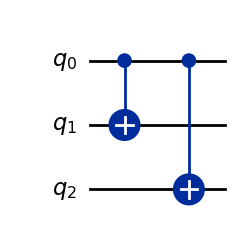

In [32]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

nqubits_main = 3
nqubits_anc = 2
nqubits_tot = nqubits_main + nqubits_anc

qreg_q = QuantumRegister(nqubits_tot) # initialize a quantum register of 5 qubits 3 for encoding and two for measurement
creg_q = ClassicalRegister(2) # initialize a classical register to store the measurements of the two ancilla qubits

bitflipcircuit = QuantumCircuit(nqubits_tot)

encodingcircuit = QuantumCircuit(nqubits_main) # create a quantum circuit object

encodingcircuit.cx(0, 1)
encodingcircuit.cx(0, 2)

encoding_gate = encodingcircuit.to_gate(label="$U_{enc}$")
bitflipcircuit.append(encoding_gate, [0,1,2])
bitflipcircuit.barrier()

encodingcircuit.draw('mpl')

Next we need to implement a quantum circuit that measures the stabilizers. This corresponds to measuring the $Z_1Z_3$ and $Z_2 Z_3$ stabilizers
which we can do by measuring each individual stabilizer. For the Z operator this corresponds to using a single CNOT. We can then measure the first stabilizer $Z_1Z_3$. For a crude non optimized case, each stabilizer will require one ancilla qubit. Since Qiskit doesn't have the larger controlled multi qubit gates as a type, we will have to define the gate ourselves:

                ░ ┌───┐┌───┐┌───┐      ░                     
q_0: ──■────■───░─┤ H ├┤ X ├┤ H ├──────░─────────────────────
     ┌─┴─┐  │   ░ └───┘└─┬─┘└───┘      ░ ┌───┐┌───┐┌───┐     
q_1: ┤ X ├──┼───░────────┼─────────────░─┤ H ├┤ X ├┤ H ├─────
     └───┘┌─┴─┐ ░ ┌───┐  │  ┌───┐┌───┐ ░ ├───┤└─┬─┘├───┤┌───┐
q_2: ─────┤ X ├─░─┤ H ├──┼──┤ X ├┤ H ├─░─┤ H ├──┼──┤ X ├┤ H ├
          └───┘ ░ └───┘  │  └─┬─┘└───┘ ░ └───┘  │  └─┬─┘└───┘
q_3: ───────────░────────■────■────────░────────┼────┼───────
                ░                      ░        │    │       
q_4: ───────────░──────────────────────░────────■────■───────
                ░                      ░                     


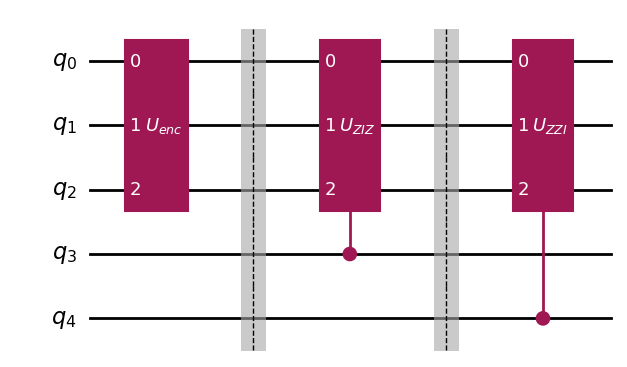

In [33]:
from qiskit.circuit.library import MCMT, ZGate
from qiskit import transpile

# encodingcircuit.h(3) # apply hadamard gates to ancilla qubits to allow for unitary measurment
# encodingcircuit.h(4)

# measure stabilizers Z1Z3 and Z2Z3
# note that qiskit qubit indexing is reversed, making these stabilizers appear "backwards"
qcz13 = QuantumCircuit(3)
qcz13.pauli('ZIZ', [0,1,2])

qcz23 = QuantumCircuit(3)
qcz23.pauli('ZZI', [0,1,2])

# alternatively, you may reverse the qubit order:
# qcz13 = QuantumCircuit(3)
# qcz13.pauli('ZIZ', [2,1,0])

# qcz23 = QuantumCircuit(3)
# qcz23.pauli('IZZ', [2,1,0])

stabilizerZ1Z3 = qcz13.to_gate(label='$U_{ZIZ}$').control(1)
bitflipcircuit.append(stabilizerZ1Z3, [3,0,1,2])

bitflipcircuit.barrier()

stabilizerZ2Z3 = qcz23.to_gate(label='$U_{ZZI}$').control(1)
bitflipcircuit.append(stabilizerZ2Z3, [4,0,1,2])

print(bitflipcircuit.decompose())
bitflipcircuit.draw('mpl')